In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\bever\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv(os.path.join("..", "data", "exoplanet_data.csv"))
#" Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
# selected_features = df.drop("koi_disposition", axis=1)
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_period', 'koi_period_err1', 
                        'koi_period_err2', 'koi_time0bk','koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 
                        'koi_impact_err1','koi_impact_err2', 'koi_duration', 'koi_duration_err1','koi_duration_err2', 
                        'koi_depth', 'koi_depth_err1', 'koi_depth_err2','koi_prad', 'koi_prad_err1', 'koi_prad_err2']]
selected_features_names = selected_features.columns
selected_features.head()
selected_features_names = selected_features.columns
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30


In [6]:
selected_features_names

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2'],
      dtype='object')

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
target = df["koi_disposition"]
target_names = ["CANIDATE", "CONFIRMED","FALSE POSITIVE"]
data = selected_features
data_names = selected_features_names

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-0.150,3.61600,0.3060,-0.3060,123.1,13.2,-13.2,1.24,0.34,-0.23
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-0.291,2.30900,0.2820,-0.2820,114.6,9.3,-9.3,0.86,0.23,-0.06
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-0.942,79.89690,0.0000,0.0000,641.1,42.9,-42.9,3.21,0.97,-0.32
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-0.300,2.63120,0.0595,-0.0595,875.4,25.3,-25.3,2.25,0.07,-0.14
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-0.004,2.22739,0.0075,-0.0075,9802.0,20.0,-20.0,12.21,1.96,-1.46


In [10]:
X_test.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2
4982,1,0,0,0,88.523517,2.337000e-03,-2.337000e-03,189.275600,0.023200,-0.023200,...,-0.6588,7.22000,1.0000,-1.0000,828.0,104.0,-104.0,1.60,0.17,-0.24
4866,0,0,0,0,102.493119,1.322000e-03,-1.322000e-03,166.009400,0.010500,-0.010500,...,-0.6667,2.81400,0.4210,-0.4210,636.1,90.1,-90.1,2.70,0.45,-0.19
2934,0,0,1,0,1.181165,3.890000e-06,-3.890000e-06,132.425220,0.002760,-0.002760,...,-0.4740,1.01300,0.1130,-0.1130,370.4,35.5,-35.5,1.52,0.20,-0.14
5007,0,1,0,0,8.412009,2.360000e-07,-2.360000e-07,139.648520,0.000024,-0.000024,...,-0.0010,5.41096,0.0012,-0.0012,136110.0,28.2,-28.2,50.83,14.43,-11.80
3869,0,1,1,1,1.195515,5.730000e-07,-5.730000e-07,132.303851,0.000410,-0.000410,...,-0.0730,5.08340,0.0249,-0.0249,8054.4,32.6,-32.6,49.33,14.13,-11.58


In [11]:
y_train.head()

6122         CANDIDATE
6370    FALSE POSITIVE
2879    FALSE POSITIVE
107          CONFIRMED
29           CANDIDATE
Name: koi_disposition, dtype: object

In [12]:
y_test.head()

4982    FALSE POSITIVE
4866         CANDIDATE
2934    FALSE POSITIVE
5007    FALSE POSITIVE
3869    FALSE POSITIVE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.844
k: 3, Train/Test Score: 0.925/0.872
k: 5, Train/Test Score: 0.910/0.884
k: 7, Train/Test Score: 0.905/0.887
k: 9, Train/Test Score: 0.899/0.884
k: 11, Train/Test Score: 0.898/0.888
k: 13, Train/Test Score: 0.896/0.884
k: 15, Train/Test Score: 0.896/0.890
k: 17, Train/Test Score: 0.894/0.889
k: 19, Train/Test Score: 0.893/0.890
k: 21, Train/Test Score: 0.890/0.888
k: 23, Train/Test Score: 0.891/0.888
k: 25, Train/Test Score: 0.891/0.887
k: 27, Train/Test Score: 0.891/0.886
k: 29, Train/Test Score: 0.891/0.887
k: 31, Train/Test Score: 0.891/0.886
k: 33, Train/Test Score: 0.889/0.886
k: 35, Train/Test Score: 0.890/0.887
k: 37, Train/Test Score: 0.890/0.886
k: 39, Train/Test Score: 0.890/0.884
k: 41, Train/Test Score: 0.889/0.888
k: 43, Train/Test Score: 0.890/0.888
k: 45, Train/Test Score: 0.888/0.888
k: 47, Train/Test Score: 0.889/0.884
k: 49, Train/Test Score: 0.889/0.887
k: 51, Train/Test Score: 0.888/0.887
k: 53, Train/Test Score: 0.889/0.887
k: 55,

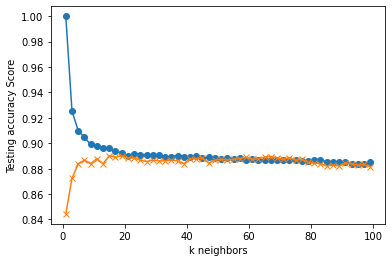

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

print('k=15 Test Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.896
k=15 Test Acc: 0.890


In [16]:
knn

KNeighborsClassifier(n_neighbors=15)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean','manhattan'],
              'p': [1,2,3,4,5],
             'leaf_size': [10,20,30,40,50]}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [18]:
# Train the model with GridSearch
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.865, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.858, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.872, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.862, total=   0.1s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_si

[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=5, weights=distance, score=0.856, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=5, weights=distance, score=0.871, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.887, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.868, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.861, total=   0.3s
[CV] leaf_size=

[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.867, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.874, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.864, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.880, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_s

[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=uniform, score=0.865, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=uniform, score=0.871, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.895, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.883, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.870, total=   0.2s
[CV] leaf_

[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.887, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.866, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=1

[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.881, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.887, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.889, total=   0.2s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.872, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.874, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.888, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.882, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.882, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.870, total=   0.2s

[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.889, total=   0.2s
[CV] 

[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.883, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.876, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.896, total=   0.2s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.883, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.890, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.886, total=   0.2s
[

[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.870, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.875, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.883, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.871, total=   0.2s
[CV]

[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.895, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.890, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.886, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.874, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.876, total=   0.

[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.886, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.893, total=   0.2s
[CV] 

[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.892, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.886, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.872, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.892, total=   0.2s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.880, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.893, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.890, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.885, total=   0.2s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.873, total=   0.2s

[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.878, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.888, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.856, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.871, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.855, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.869, total=   0.2s
[CV] leaf_size=1

[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.857, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.888, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.872, total=   0.1s
[CV] leaf_s

[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.869, total=   0.1s
[CV] lea

[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.860, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.877, total=   0.2s
[CV] leaf_si

[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.897, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=1

[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.867, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.2s
[C

[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.869, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.867, total=   0.1s

[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.897, total=   0.2s
[CV] 

[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=distance, score=0.881, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s


[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=uniform, score=0.871, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=uniform, score=0.875, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.900, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.878, total=   0.1s
[

[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=distance, score=0.865, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.865, total=   0.2s
[CV]

[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.882, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.894, total=   0.2

[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform, score=0.868, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform, score=0.875, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.896, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.881, total=   0.1s
[

[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.884, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] l

[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.896, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.884, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.870, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.872, total=   0.2s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.896, total=   0.2

[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.858, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.862, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_si

[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.868, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.861, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=2

[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.864, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.865, total=   0.2s
[CV] leaf_size=

[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.895, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.2s
[CV] leaf

[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.866, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.889, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.869, total=   0.2s
[CV] leaf_

[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.887, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.875, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.891, total=   0.1s
[CV] 

[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.870, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.873, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.883, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.889, total=   0.2s


[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[

[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.876, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] l

[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.886, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.892, total=   0.2s


[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.885, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.870, total=   0.1s

[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.876, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.891, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] l

[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.893, total=   0.1s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.893, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.888, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.872, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.892, total=   0.2

[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.888, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.870, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.2s
[CV

[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.885, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.873, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.878, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.893, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[C

[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.855, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.869, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.886, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.857, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.855, total=   0.1s
[CV] leaf_

[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.855, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size

[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.877, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.860, total=   0.2s
[CV] leaf_size=

[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.860, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.897, total=   0.2s
[CV] leaf

[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.877, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.867, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_si

[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.868, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.878, total=   0.2s
[CV] l

[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.867, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.877, total=   0.2s


[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.885, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.870, total=   0.1s

[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.898, total=   0.1s
[CV] 

[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.883, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.868, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.884, total=   0.2s


[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.879, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.865, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.900, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.880, total=   0.1s
[

[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.881, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.867, total=   0.3s
[CV]

[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=uniform, score=0.875, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.880, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.881, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.868, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.

[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.884, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.896, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.882, total=   0.1s
[CV

[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.879, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.878, total=   0.2s
[C

[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.862, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.856, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] lea

[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.868, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.861, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.880, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.889, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.2s
[CV] leaf_size

[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.864, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.880, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.894, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.865, total=   0.3s
[CV] leaf_size=

[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.885, total=   0.1s
[CV] leaf_s

[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.866, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.869, total=   0.1s
[CV] leaf_

[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.873, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.887, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.889, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.874, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.875, total=   0.3s
[CV] l

[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.873, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.883, total=   0.2

[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.889, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[

[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.876, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] l

[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.886, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.892, total=   0.2s


[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.885, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.870, total=   0.2s

[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.891, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.896, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.895, total=   0.1s
[CV] 

[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.888, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.872, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.886, total=   0.2s
[C

[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.886, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.872, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.879, total=   0.

[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.893, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=2, weights=distance, score=0.893, total=   0.1s
[CV] 

[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.857, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.888, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.856, total=   0.1s
[CV] leaf_s

[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.867, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.869, total=   0.1s
[CV] lea

[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.860, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.877, total=   0.1s
[CV] leaf_si

[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.897, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=30

[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.866, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.876, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] le

[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.868, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.878, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.899, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=30, metric=man

[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.869, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.880, total=   0.1s
[CV] l

[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.885, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=uniform, score=0.894, total=   0.2

[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.878, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.898, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.879, total=   0.1s
[CV

[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.878, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.868, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.884, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.876, total=   0.1s
[C

[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.900, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.865, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.883, total=   0.

[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=3, weights=distance, score=0.881, total=   0.1s
[CV

[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.868, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.898, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.868, total=   0.2s
[CV]

[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.896, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.877, total=   0.

[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=distance, score=0.896, total=   0.1s
[CV] 

[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.862, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.856, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform, score=0.881, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform, score=0.865, total=   0.1s
[CV] leaf_s

[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.861, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.864, total=   0.1s
[CV] leaf_

[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.882, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.865, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.871, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.895, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size

[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.885, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.866, total=   0.2s
[CV] leaf_size=

[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.887, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.889, total=   0.1s
[CV] le

[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.875, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.891, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.879, total=   0.1s
[

[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.873, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.883, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.889, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.876, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.872, total=   0.2s
[CV]

[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.875, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.

[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.890, total=   0.1s
[CV] 

[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.886, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.892, total=   0.2s


[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.883, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.885, total=   0.1s
[

[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.876, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.891, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.896, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] l

[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.893, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.893, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.892, total=   0.1

[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.892, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.870, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.1s
[CV

[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.873, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.893, total=   0.1s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.871, total=   0.2s
[CV]

[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.869, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.886, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.857, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.869, total=   0.1s
[CV] lea

[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.855, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.877, total=   0.1s
[CV] leaf_si

[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.860, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.871, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=4

[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.860, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.897, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=

[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.866, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.876, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.896, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] le

[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.868, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.899, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.878, total=   0.1s
[

[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.867, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.896, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.869, total=   0.1s
[CV]

[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=uniform, score=0.882, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.885, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.

[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.894, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.898, total=   0.2s
[CV] 

[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.868, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.896, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.884, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.876, total=   0.1s
[C

[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.900, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.865, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.883, total=   0.

[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=distance, score=0.897, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=distance, score=0.881, total=   0.1s
[CV

[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.868, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.898, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.868, total=   0.2s
[CV]

[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.896, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.877, total=   0.

[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=distance, score=0.896, total=   0.1s
[CV] 

[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.856, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform, score=0.881, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform, score=0.865, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform, score=0.873, total=   0.1s
[CV] leaf_siz

[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.864, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=2, weights=uniform, score=0.887, total=   0.2s
[CV] leaf

[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.865, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.895, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.883, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.870, total=   0.1s
[CV] leaf_

[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.885, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.866, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.876, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.889, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size

[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.889, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.874, total=   0.1s
[CV] le

[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.875, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.891, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.873, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.873, total=   0.

[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.883, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.889, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.876, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=uniform, score=0.874, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=5, weights=distance, score=0.888, total=   0.1s
[CV] 

[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.875, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=5, weights=uniform, score=0.885, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=5, weights=uniform, score=0.892, total=   0.1s


[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.881, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.880, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.883, total=   0.1s
[

[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.889, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.892, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.883, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.874, total=   0.1s
[CV]

[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.885, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.875, total=   0.

[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.891, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.896, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.885, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.895, total=   0.1s
[CV] 

[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.893, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.892, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.892, total=   0.1s


[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.870, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.879, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.892, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.886, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.872, total=   0.1s

[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.893, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.888, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.880, total=   0.2s
[CV] l

[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.886, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.857, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.855, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.869, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.888, total=   0.1s
[CV] leaf

[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.855, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.867, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.888, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.874, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.855, total=   0.1s
[CV] leaf_

[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.860, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.890, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size

[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=distance, score=0.871, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.897, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.867, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=50

[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.866, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.876, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.877, total=   0.1s
[CV] le

[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.868, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.878, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.899, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.878, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.867, total=   0.1s

[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.877, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.869, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.880, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=5, weights=distance, score=0.897, total=   0.1s
[CV] 

[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.885, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=5, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=5, weights=uniform, score=0.885, total=   0.2s


[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.876, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.873, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.898, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.880, total=   0.1s
[

[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.868, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.884, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.876, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.871, total=   0.2s
[CV]

[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.876, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.900, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.880, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.865, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.883, total=   0.

[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.894, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.879, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.876, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.867, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=3, weights=distance, score=0.897, total=   0.1s
[CV] 

[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.880, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.881, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.868, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.877, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.898, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.879, total=   0.1s


[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.877, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.871, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.896, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.882, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.881, total=   0.1s
[

[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.870, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.872, total=   0.1s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.896, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.885, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.878, total=   0.2s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.874, total=   0.2s
[CV]

[Parallel(n_jobs=1)]: Done 7000 out of 7000 | elapsed: 18.1min finished


In [19]:
# Output the grid search best params and best score
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
0.8846042032033417


In [20]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8878718535469108


In [21]:
# Found in article https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
best_params = grid_result.best_params_
best_knn = KNeighborsClassifier(metric=best_params["metric"],n_neighbors=best_params["n_neighbors"],weights=best_params["weights"],leaf_size=best_params["leaf_size"],p=best_params["p"])
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=25, p=1,
                     weights='distance')

In [22]:
# Output our training and test score
print(f"Best KNN Training Data Score: {best_knn.score(X_train_scaled, y_train)}")
print(f"Best KNN Testing Data Score: {best_knn.score(X_test_scaled, y_test)}")

Best KNN Training Data Score: 1.0
Best KNN Testing Data Score: 0.8878718535469108


In [23]:
# Make predictions and calculate classification report
predictions = best_knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

      CANIDATE       0.82      0.70      0.76       411
     CONFIRMED       0.78      0.85      0.81       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.89      1748



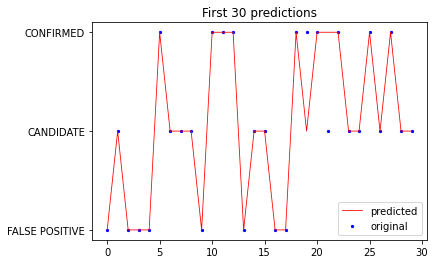

In [24]:
# Create a preduction vs original chart
x_ax = range(len(y_test[:30]))
plt.scatter(x_ax, y_test[:30], s=5, color="blue", label="original")
plt.plot(x_ax, predictions[:30], lw=0.8, color="red", label="predicted")
plt.title('First 30 predictions')
plt.legend()
plt.show()

# Save the Model

In [25]:
# Save the model
filename = os.path.join("..", "models", "model_KNN.sav")
joblib.dump(best_knn, filename)

['..\\models\\model_KNN.sav']

In [26]:
# Save the grid
filename = os.path.join("..", "models", "grid_KNN.sav")
joblib.dump(grid, filename)

['..\\models\\grid_KNN.sav']